In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [5]:
#Create a path to where your data is stored.
path = r'/Users/amyzhang/Desktop/CF_ML_ClimateWins/Data Sets'

In [8]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'DATASET.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

In [11]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [14]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

In [17]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1988')] #<-----INSERT YEAR HERE
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10227  19880101      1        -0.610107           -1.209812   
10228  19880102      1         0.041765           -1.096320   
10229  19880103      1        -0.352074           -0.506165   
10230  19880104      1        -0.243429           -0.540212   
10231  19880105      1         0.109668           -0.574259   
...         ...    ...              ...                 ...   
10588  19881227     12        -0.678010           -0.994178   
10589  19881228     12        -1.017527           -0.869337   
10590  19881229     12        -0.963204           -1.232510   
10591  19881230     12        -1.289140           -1.073622   
10592  19881231     12        -1.452108           -1.232510   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10227           -0.981529         -0.288400             -0.253102   
10228           -1.087400          0.138800              0.026704   
10229           -0.875659         -0.304223             -0.385642   
10230           -0.781551         -0.320045             -0.370915   
10231           -0.628627         -0.098534              0.056157   
...                   ...               ...                   ...   
10588           -0.569810         -0.130178             -0.223649   
10589           -0.558047         -0.161822             -0.120563   
10590           -0.805078         -0.414978             -0.547635   
10591           -0.769788         -0.668134             -1.018887   
10592           -0.993293         -0.430800             -0.665448   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10227         -0.595104           -0.281182         -0.404402   
10228         -0.057993           -0.141411         -0.020472   
10229          0.005949           -0.578193         -0.419168   
10230         -0.237030           -0.455894         -0.670199   
10231         -0.364913           -0.490837         -0.035238   
...                 ...                 ...               ...   
10588         -0.045204           -0.403481         -0.463468   
10589         -0.300972           -0.211297         -0.374868   
10590         -0.083570           -0.578193         -0.463468   
10591         -0.147511           -0.665550         -0.891697   
10592         -0.416067           -0.700492         -0.803098   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10227            -0.959118             -0.322130         -1.338737   
10228            -0.704829              0.097955         -1.150029   
10229            -0.535303             -0.367139         -0.664782   
10230            -0.632175             -0.352136         -1.163509   
10231            -0.220469             -0.052075         -1.055676   
...                    ...                   ...               ...   
10588            -1.540350             -0.172100         -0.988280   
10589            -1.382933             -0.127091         -1.230904   
10590            -1.419260             -0.562179         -1.379174   
10591            -1.600895             -0.907249         -1.176988   
10592            -1.685658             -0.727212         -1.136550   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10227           -0.579927       -0.150170       -1.280450   
10228            0.048442       -0.405002       -1.617214   
10229           -0.403983       -0.550620       -0.724789   
10230           -0.579927       -0.708373       -0.842657   
10231           -0.253175       -0.756913       -1.112068   
...                   ...             ...             ...   
10588           -0.667898       -0.793317       -1.566700   
10589           -0.429118       -0.696239       -1.953979   
10590           -0.881544       -0.417137       -1.566700   
10591           -1.070054       -0.235114       -1.583538   
10592           -1.296267       -0.587025       -1.751920   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10

In [20]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [25]:
n_rows = dfyear.shape[0]
n_rows

366

In [28]:
dfyear['MADRID_temp_mean'].shape

(366,)

## Weatherstation #3: MADRID

In [34]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [37]:
X.shape, y.shape

((366, 2), (366, 1))

In [40]:
print("First 5 rows of X:\n", X[:5])  
print("First 5 values of y:\n", y[:5])


First 5 rows of X:
 [[1.   0.01]
 [1.   0.02]
 [1.   0.03]
 [1.   0.04]
 [1.   0.05]]
First 5 values of y:
 [[-1.33873675]
 [-1.15002949]
 [-0.66478225]
 [-1.16350858]
 [-1.05567586]]


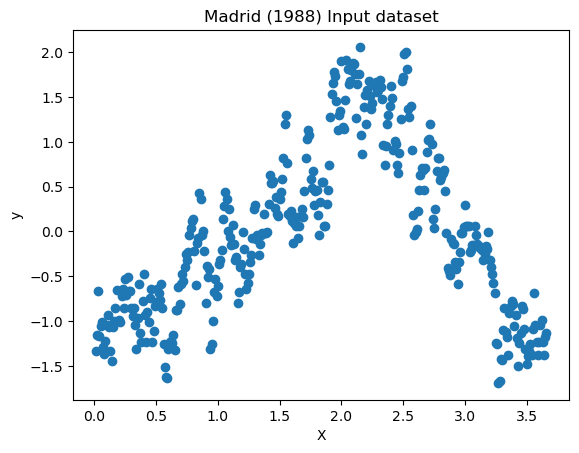

In [45]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['MADRID_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Madrid (1988) Input dataset');

plt.show()

In [48]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].min()

-1.6891930894872644

In [51]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].max()

2.057993911109622

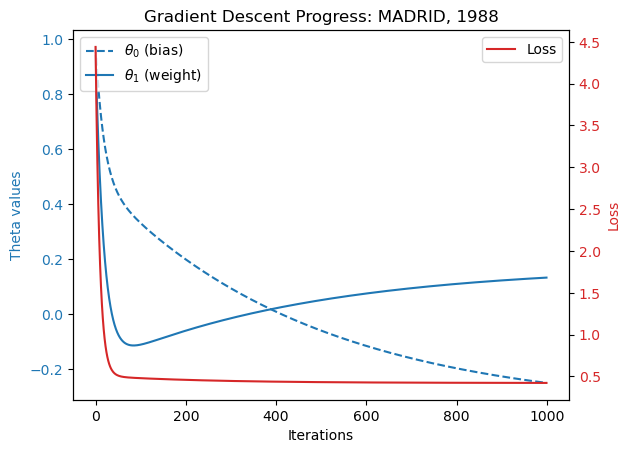

In [54]:
# Prediction Function

def predict(X, theta):
    return X @ theta

# Cost Function (Loss Function)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

# Gradient Descent

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    
    J_history = []
    theta0_history = []
    theta1_history = []
    
    for i in range(num_iters):
        predictions = predict(X, theta)
        error = predictions - y
        gradients = (1 / m) * (X.T @ error)
        theta -= alpha * gradients
        
        # Save history for plotting
        J_history.append(compute_cost(X, y, theta))
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
    
    return theta, J_history, theta0_history, theta1_history

# Feature Matrix Setup

index = np.arange(0.01, 3.67, 0.01).reshape(-1, 1)  # shape should be (366, 1)
ones = np.ones_like(index)  # same shape as index

X = np.hstack([ones, index])  # shape (366, 2)
y = dfyear['MADRID_temp_mean'].values.reshape(-1, 1)  # shape (366, 1)

# Run Gradient Descent

theta_init = np.array([[1.0], [1.0]])
alpha = 0.01
iterations = 1000

theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init, alpha, iterations)

# Plot Loss and Thetas

fig, ax1 = plt.subplots()

# Plot thetas
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_0$ (bias)', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_1$ (weight)', linestyle='-', color=color)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Theta values', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Plot loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(J_history, label='Loss', color=color)
ax2.set_ylabel('Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Gradient Descent Progress: MADRID, 1988')
plt.show()


In [57]:
# Step 1: Create a grid of theta values
theta0_vals = np.linspace(-3, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)

# Step 2: Create a meshgrid (like coordinate matrices)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Step 3: Compute J (loss) for every (theta0, theta1) combo
J_vals = np.zeros(T0.shape)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[T0[i, j]], [T1[i, j]]])
        J_vals[i, j] = compute_cost(X, y, t)

import plotly.graph_objects as go

line_marker = dict(color='#101010', width=2)

fig_1 = go.Figure()
fig_1.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)

# Add the descent path
fig_1.add_scatter3d(
    x=theta1_history, 
    y=theta0_history, 
    z=J_history, 
    mode='lines+markers',
    line=line_marker,
    name='Gradient Descent Path'
)

fig_1.update_layout(
    title='Loss Function and Gradient Descent Path',
    autosize=True,
    width=600, height=600,
    scene=dict(
        xaxis_title='theta1',
        yaxis_title='theta0',
        zaxis_title='Loss'
    )
)

fig_1.show()


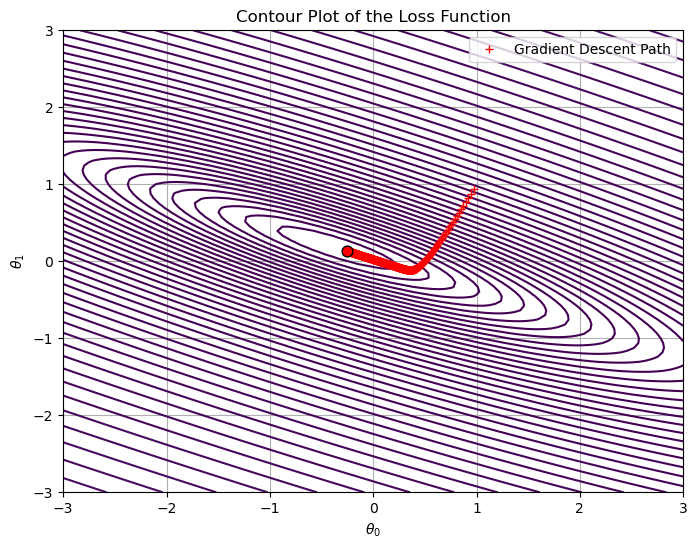

In [60]:
# Plot the 2D contour of the loss function surface with gradient descent path

# Contour plot of the cost function J(θ₀, θ₁)
plt.figure(figsize=(8, 6))
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 100), cmap='viridis')

# Add labels and title
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Contour Plot of the Loss Function')

# Overlay the path taken by gradient descent
plt.plot(theta0_history, theta1_history, 'r+', label='Gradient Descent Path')

# Optional: annotate final theta
plt.scatter(theta0_history[-1], theta1_history[-1], color='red', s=60, edgecolors='black', zorder=5)
plt.legend()

plt.grid(True)
plt.show()


In [63]:
print("Final θ₀:", theta[0][0])
print("Final θ₁:", theta[1][0])
print("Final loss:", J_history[-1])


Final θ₀: -0.24877471367752954
Final θ₁: 0.13365832974448524
Final loss: 0.4228413035128448
